<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ironman-finisher-data" data-toc-modified-id="Ironman-finisher-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ironman finisher data</a></span></li><li><span><a href="#Wetsuit-data" data-toc-modified-id="Wetsuit-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Wetsuit data</a></span></li></ul></div>

This code scrapes Ironman finisher data at the athlete level.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json
from lxml import html
import requests
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', 100)

## Ironman finisher data

In [ ]:
# define variable names (in order as appear on webpage)

dfcolumns = ['athletename', 'athleteid', 'athleteurl', 'bib_n', 'gender', 'division', \
             'divurl', 'konadiv', 'seriesid', 'seriesurl', 'raceid', \
             'raceurl', 'racename', 'raceyear', 'racedate', 'racetype', \
             'konayear', 'konaslots', 'swimtime', 'swimrank', 'swimrankdiv', \
             'swimrankgender', 'biketime', 'bikerank', 'bikerankdiv', \
             'bikerankgender', 'runtime', 'runrank', 'runrankdiv', \
             'runrankgender', 'overalltime', 'overallrank', 'overallrankdiv', \
             'overallrankgender', 'konarankdiv', 'trans1time', 'trans1rank', \
             'trans1rankdiv', 'trans1rankgender', 'trans2time', 'trans2rank', \
             'trans2rankdiv', 'trans2rankgender', 'finish', 'autokonaqual']


# define scraping function

def get_ath_df(userid):
    """Returns athlete-race level dataframe
    """    
    print("Aquiring data for user: %d       " % userid, end='\r')
    
    # get web response
    urlbase = "https://www.coachcox.co.uk/imstats/athlete/"
    url = urlbase + str(userid)
    response = requests.get(url)
    html = response.content
        
    # translate to BeautifulSoup object
    soup = BeautifulSoup(html, 'lxml')
    
    # find athlete data
    s = soup.find("script", text=re.compile(r"var imathleteresultstable"))
    try:
        s = s.contents[0]
    except:
        # no data found, return null
        return None
    
    # within the JS script, find the array with relevant data
    start = 'var imathleteresultsdata = '
    end = ';'
    datastring = s[s.find(start)+len(start):s.find(end)]
    
    # get athlete name
    athletename = soup.find("title").contents[0]
    athletename = athletename[13:athletename.find(" Race Results")]

    # turn data into df and clean/label
    data = json.loads(datastring)
    dfath = pd.DataFrame(data)
    dfath.insert(loc=0, column='athletename', value=athletename)
    dfath.columns = dfcolumns
    dfath.loc[:,'racedate'] = dfath.racedate.apply(lambda x: x['d'])
    #dfath.loc[:,'racedate'] = dfath.racedate.apply(lambda x: dt.strptime(x['d'], "%d %b %Y"))

    return dfath 


# demonstrate use for one athlete

df = get_ath_df(184495)
df.head()

In [ ]:
# get data for a few users and append to one df

df_array = []
nodata = []

for i in range(23786, 23786 + 10):
    dfath = get_ath_df(i)
    if isinstance(dfath, pd.DataFrame):
        df_array.append(dfath)
    else:
        nodata.append(i)
        
df_all = pd.concat(df_array, 0)
        
print("\ndone\n")
print("Total athletes captured: {}".format(len(df_all.athleteid.unique())))
print("Total athletes failed: {}".format(len(nodata)))

df_all.head()

## Wetsuit data

Cobalt
Cobalt Mirror       
Cobalt Mirror       
Amber Mirror
Amber mirror
Cobalt Mirror       
Cobalt mirror       
Cobalt Mirror       
Cobalt Mirror        
Amber Mirror
Amber mirror
Cobalt Mirror       
Vermillion Mirror  
Cobalt Mirror       
 | 
 | 
Cobalt Mirror       
 | 
Vermillion Mirror  
Amber Mirror
Cobalt Mirror       
 | 
Cobalt Mirror       
Amber Mirror
Cobalt Mirror       
Amber Mirror
 | 
Amber Mirror
 | 
 | 
 | 
 | 
Vermillion Mirror
Amber Mirror
 | 
Amber Mirror
 | 
Grey Mirror
 | 
 | 
Cobalt Mirror       
 | 
Amber Mirror
Amber Mirror
Cobalt Mirror       
Amber mirror
Vermillion Mirror
Vermillion Mirror
 | 
Amber mirror
Amber mirror
Vermillion Mirror
Amber mirror
Cobalt Mirror       
 | 
Amber Mirror
Amber Mirror
Amber Mirror
Amber Mirror
 | 
 | 
 | 
 | 
Amber Mirror
Vermillion Mirror
Cobalt Mirror       
Cobalt Mirror       
Amber Mirror
Cobalt Mirror       
Cobalt Mirror       
 | 
Amber Mirror
 | 
Amber Mirror
 | 
Amber Mirror
 | 
Amber Mirror
 | 
Cobalt Mirror

,venuename,watertemp,suittype
0,IRONMAN 70.3 South africa,19°C,Wetsuit
1,IRONMAN 70.3 Dubai,21°C,Wetsuit
2,IRONMAN 70.3 Geelong,18°C,Wetsuit
3,IRONMAN 70.3 New Zealand,18°C,Wetsuit
4,IRONMAN New Zealand,18°C,Wetsuit


50.0


,venuename,suittype,watertempavg
0,ironman 70.3 south africa,wetsuit,66.2
1,ironman 70.3 dubai,wetsuit,69.8
2,ironman 70.3 geelong,wetsuit,64.4
3,ironman 70.3 new zealand,wetsuit,64.4
4,ironman new zealand,wetsuit,64.4


115
wetsuit     112
swimskin      3
Name: suittype, dtype: int64


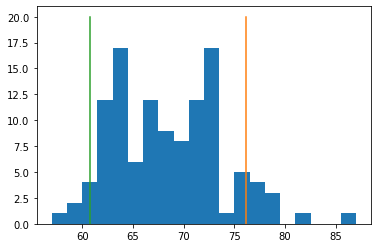

In [65]:
# url = "https://www.roka.com/pages/average-ironman-water-temperatures"
# response = requests.get(url)
# html = response.content

# soup = BeautifulSoup(html, 'lxml')
    
# find wetsuit data
wetsuit_data = soup.find_all("div", {'class': 'row_190425_water_temp_chart'})

race_data_lst = []
for idx, w in enumerate(wetsuit_data):
    race_data = w.find_all("div", {'class': 'line_190425_water_temp_chart'})
    print(race_data[3].text)
    if race_data[3].text.strip() == '|':
        suit2 = ', ' + race_data[4].text
    else:
        suit2 = ''
    race_data_lst.append(pd.DataFrame(
        {'venuename': race_data[0].text,
        'watertemp': race_data[1].text,
        'suittype': (race_data[2].text + suit2)}, index=[idx]))
    
dfwater = pd.concat(race_data_lst, 0)
display(dfwater.head())


# lowercase the venue names and suit type names 
for v in ['venuename', 'suittype']:
    dfwater[v] = dfwater[v].apply(lambda x: x.lower())

    
# convert celsius to farenheight
def temp_to_f(x):
    '''
    Takes a temperature str "x" returns the numeric temp in F
    '''
    if x[-1] == "C":
        return round(int(x[:2]) * 9/5 + 32, ndigits=1)
    return int(x[:2])
print(temp_to_f('100°C'))

dfwater['watertempavg'] = dfwater.watertemp.apply(lambda x: temp_to_f(x))
dfwater.drop('watertemp', 1, inplace=True)


# print cleaned data sample
display(dfwater.head())


# check data
print(len(dfwater.venuename.unique()))
print(dfwater.suittype.value_counts())

# plot avg water temp distribution
plt.hist(dfwater.watertempavg, bins=20)
# optional/illegal cutoff temp (>76.1 wetsuits not allowed)
plt.plot([76.1, 76.1], [0, 20])
# mandatory/optional cutoff temp (<60.8 wesuits mandatory)
plt.plot([60.8, 60.8], [0, 20])


# save as csv

# dfwater.to_csv('dir/dfwater.csv', index=False)

In [62]:
dfwater.suittype2.value_counts().index

Index([' | ', 'Cobalt Mirror       ', 'Amber Mirror', 'Vermillion Mirror',
       'Amber mirror', 'Vermillion Mirror  ', 'Amber Mirror',
       'Cobalt Mirror        ', 'Amber Mirror       ', 'Grey Mirror', 'Cobalt',
       'Cobalt mirror       ', 'Cobalt mirror       '],
      dtype='object')